# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [2]:
suppressPackageStartupMessages(library('tidyverse'))

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”


Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [3]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
    filter(sports == 'Basketball') |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    select(year, institution_name, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

glimpse(ncaa_sports_spending)

Rows: 20,000
Columns: 4
$ year             <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ institution_name <chr> "Alabama A & M University", "Alabama A & M University…
$ men_or_women     <chr> "men", "women", "men", "women", "men", "women", "men"…
$ expenditure_usd  <dbl> 817868, 742460, 4189826, 1962579, 612569, 386007, 859…


**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** you can use `geom_col` with `x` and `y` encodings so the bar height reflects spending.)

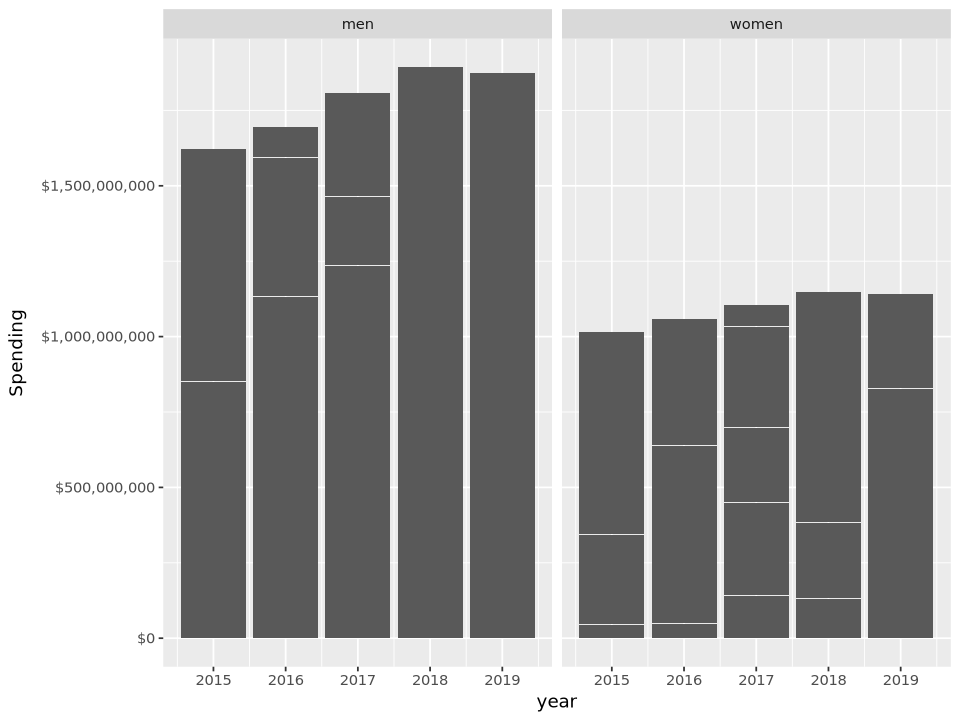

In [6]:
# bar chart code goes here
options(repr.plot.res = 120, repr.plot.height = 6, repr.plot.width = 8)
ggplot(ncaa_sports_spending,aes(x=year,y=expenditure_usd))+
geom_col(na.rm = TRUE)+
facet_wrap(~men_or_women)+
scale_y_continuous(labels = scales::dollar_format())+ labs(y = 'Spending')


You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/2023/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

**Visualize the same data but this time with a line chart. Make sure your lines are "grouped" according to the `men_or_women` column.**

*Note: use the `ncaa_sports_spending2` table for the line chart! 📈*

In [36]:
# uncomment and run to produce the line chart table

ncaa_sports_spending2 = ncaa_sports_spending |>
    group_by(year, men_or_women) |>
    summarize(expenditure_usd = sum(expenditure_usd, na.rm = TRUE), .groups = "drop")

ncaa_sports_spending2 |> head()

year,men_or_women,expenditure_usd
<dbl>,<chr>,<dbl>
2015,men,1622132863
2015,women,1013740678
2016,men,1695782608
2016,women,1057390299
2017,men,1809020416
2017,women,1105637602


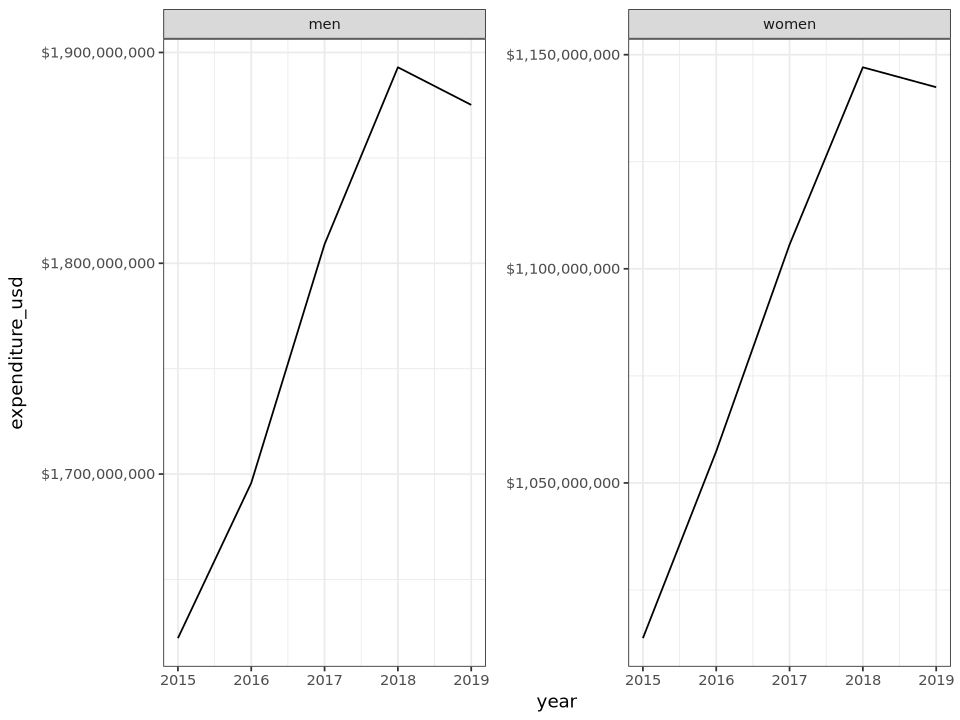

In [41]:
# line chart code goes here
ggplot(ncaa_sports_spending2,aes(x=year,y=expenditure_usd))+
geom_line()+
facet_wrap(~men_or_women,scales = 'free_y')+
scale_y_continuous(labels = scales::dollar_format())+
theme_bw()


Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [28]:
unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
    filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    arrange(rev(men_or_women), expenditure_usd) |>
    mutate(sports = fct_inorder(sports)) |>
    select(year, institution_name, sports, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
    mutate(weight = expenditure_usd / 1e6) |>
    filter(!is.na(expenditure_usd))

In [29]:
glimpse(unc_sports_spending_2019)

Rows: 24
Columns: 6
$ year             <dbl> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,…
$ institution_name <chr> "University of North Carolina at Chapel Hill", "Unive…
$ sports           <fct> "Fencing", "Golf", "Rowing", "Gymnastics", "Tennis", …
$ men_or_women     <chr> "women", "women", "women", "women", "women", "women",…
$ expenditure_usd  <dbl> 212291, 729939, 745952, 1022938, 1064746, 1255235, 13…
$ weight           <dbl> 0.212291, 0.729939, 0.745952, 1.022938, 1.064746, 1.2…


Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

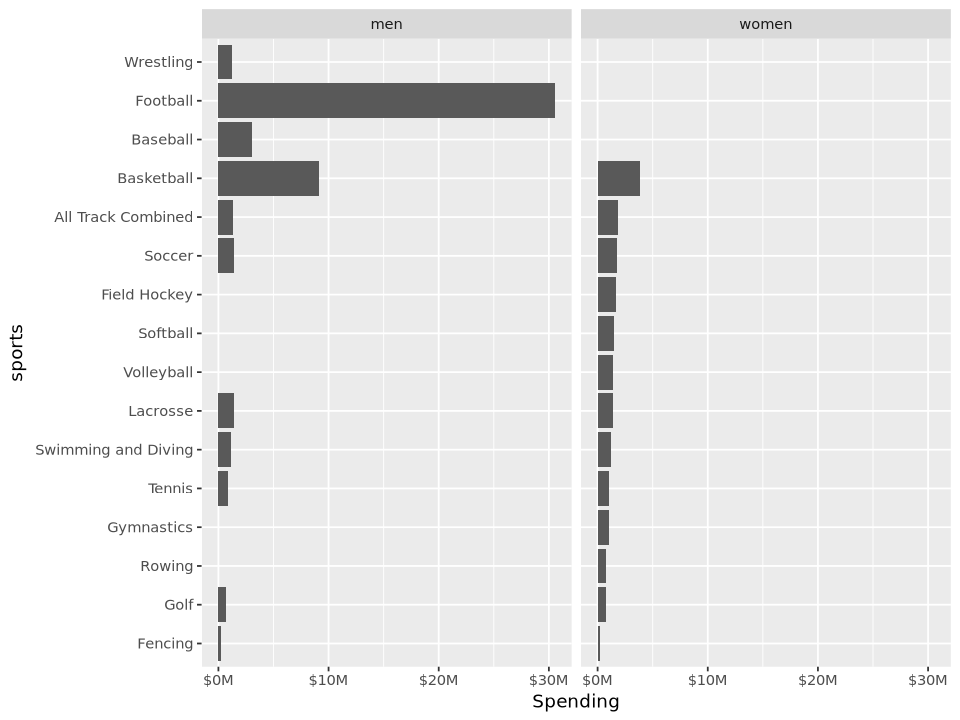

In [42]:
# bar chart code goes here
ggplot(unc_sports_spending_2019,aes(x=weight,y=sports))+
geom_col()+
facet_wrap(~men_or_women)+
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')

You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/2023/unc_sports_spending.png). **Your chart does not need to look exactly like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?

```r
weight = expenditure_usd / 1e6
```
**is used to shorten the spends to 1 million;**

```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M'))
```
**is used to change the x-axis value to million and add in a dollar sign;**
```r
labs(x = 'Spending')
```
**is used to replace the x-axis label from `weight` to `Spending`.**